Here we will import all the necessary libraries. In this case, we will need __Pandas__ Dataframes to transform the data and __Mathplotlib__ to display is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will need to load the data which comes from an csv file already extracted using BeautifulSoup from League of Legends Match History website.  __[Available Here](https://matchhistory.eune.leagueoflegends.com/en/#match-history/EUW1/23004123)__

In [2]:
df =pd.read_csv("league.csv")
df.head(5)

,Unnamed: 0,champs,wins,dates
0,0,Braum,game-summary-victory,11/11/2018
1,1,Braum,game-summary-victory,11/10/2018
2,2,Braum,game-summary-victory,11/10/2018
3,3,Braum,game-summary-victory,11/9/2018
4,4,Braum,game-summary-victory,11/9/2018


Change the [dates] column from string to __Pandas__ datetime format. Also we create the [Day_of_week] column

In [3]:
#df.drop(columns=['Unnamed: 0'], axis=1)
df['dates'] = pd.to_datetime(df['dates'], errors='coerce')
df['day_of_week'] = df['dates'].dt.weekday_name
df.head(5)

,Unnamed: 0,champs,wins,dates,day_of_week
0,0,Braum,game-summary-victory,2018-11-11,Sunday
1,1,Braum,game-summary-victory,2018-11-10,Saturday
2,2,Braum,game-summary-victory,2018-11-10,Saturday
3,3,Braum,game-summary-victory,2018-11-09,Friday
4,4,Braum,game-summary-victory,2018-11-09,Friday


We should also replace the way how League's website describe the outcome of the games: __Victory, Defeat and Early Surrender__

In [4]:
df.wins.replace(['game-summary-victory', 'game-summary-defeat', 'game-summary-earlysurrender'], ['win', 'defeat', 'surrender'], inplace=True)
df.head(5)

,Unnamed: 0,champs,wins,dates,day_of_week
0,0,Braum,win,2018-11-11,Sunday
1,1,Braum,win,2018-11-10,Saturday
2,2,Braum,win,2018-11-10,Saturday
3,3,Braum,win,2018-11-09,Friday
4,4,Braum,win,2018-11-09,Friday


To calculate the number of win/defeats per day we use the following code in absolute values

In [5]:
c = df.groupby(['day_of_week', 'wins'])['wins'].count().rename("count")
c

day_of_week  wins     
Friday       defeat        31
             surrender      3
             win           38
Monday       defeat        49
             win           33
Saturday     defeat       108
             surrender      9
             win          124
Sunday       defeat       120
             surrender      8
             win           91
Thursday     defeat        35
             surrender      4
             win           62
Tuesday      defeat        38
             surrender      3
             win           43
Wednesday    defeat        47
             surrender      2
             win           37
Name: count, dtype: int64

Finally, we can calculate a percentage of wins per day

In [6]:
df2=pd.DataFrame()
win_percentage = c / c.groupby(level=0).sum()
df2['win_percentage']=win_percentage
df2

win_percentage
day_of_week wins                     
Friday      defeat           0.430556
            surrender        0.041667
            win              0.527778
Monday      defeat           0.597561
            win              0.402439
Saturday    defeat           0.448133
            surrender        0.037344
            win              0.514523
Sunday      defeat           0.547945
            surrender        0.036530
            win              0.415525
Thursday    defeat           0.346535
            surrender        0.039604
            win              0.613861
Tuesday     defeat           0.452381
            surrender        0.035714
            win              0.511905
Wednesday   defeat           0.546512
            surrender        0.023256
            win              0.430233

We plot the results in a stacked bar chart

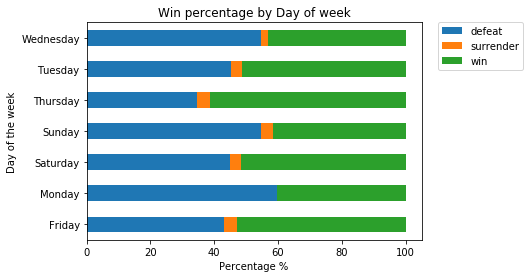

In [7]:
df.groupby(['day_of_week','wins']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='barh',stacked=True)
plt.xlabel('Percentage %')
plt.ylabel('Day of the week')
plt.title('Win percentage by Day of week')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

What is the average win-lose ratio?

In [8]:
win_avg = df.groupby(['wins'])['wins'].count().rename("count")
win_avg_ration = win_avg/ win_avg.sum()
win_avg_ration

wins
defeat       0.483616
surrender    0.032768
win          0.483616
Name: count, dtype: float64

And per champion?

In [19]:
champ_avg = df.groupby(['champs','wins'])['wins'].count().rename("count")
champ_avg_ration = champ_avg/ df.groupby(['champs'])['wins'].count()
champ_avg_ration

df3=pd.DataFrame()
df3['games']=champ_avg
df3['win_percentage']=champ_avg_ration
df3

games  win_percentage
champs           wins                            
 Alistar         defeat         6        0.500000
                 win            6        0.500000
 Bard            defeat        63        0.588785
                 surrender      2        0.018692
                 win           42        0.392523
 Braum           defeat         9        0.214286
                 surrender      1        0.023810
                 win           32        0.761905
 Caitlyn         defeat         2        1.000000
 Janna           defeat        42        0.560000
                 surrender      4        0.053333
                 win           29        0.386667
 Leona           defeat         3        0.428571
                 win            4        0.571429
 Lulu            defeat        35        0.432099
                 surrender      3        0.037037
                 win           43        0.530864
 Malphite        defeat         5        0.384615
                 win            8        0.615385
 Nami            defeat        17        0.472222
                 surrender      3        0.083333
                 win           16        0.444444
 Nunu & Willump  defeat        20        0.555556
                 surrender      3        0.083333
                 win           13        0.361111
 Ornn            defeat        26        0.426230
                 surrender      1        0.016393
                 win           34        0.557377
 Ryze            defeat         1        1.000000
 Sona            defeat         3        0.333333
                 win            6        0.666667
 Soraka          defeat        21        0.656250
                 surrender      1        0.031250
                 win           10        0.312500
 Tahm Kench      defeat       171        0.471074
                 surrender     11        0.030303
                 win          181        0.498623
 Taric           defeat         1        1.000000
 Tristana        win            2        1.000000
 Varus           defeat         1        1.000000
 Vayne           defeat         2        0.500000
                 win            2        0.500000